In [68]:
import mbuild as mb
import foyer
import unyt as u

# Prepare recipes with mBuild - UA polymer


We will be creating a united atom polymer (i.e., no-hydrogen atoms) that we will atom-type with using the TraPPE force field.  

To create this polymer we need two different interaction sites, one corresponding to CH3 (terminal interaction sites) and one corresponding to CH2 (middle interactions sites). 

Let us first examine the code to create a CH3 site:

In [69]:
class _CH3(mb.Compound):
    def __init__(self):
        super().__init__()
        self.name = "_CH3"
        
        """Create a particle name _CH3 and add it to self."""
        _ch3 = mb.Compound(pos=[0.0, 0.0, 0.0], name='_CH3')
        self.add(_ch3)
     
        """Create a port attached to the _CH3 particles, label as 'up'.
        Use the separation value of the _CH2's ports as above.
        """
        port_up = mb.Port(anchor=_ch3, orientation=[0, 1, 0], separation=0.07)
        self.add(port_up, "up")         

Create a temporary instance of the `_CH3` compound and visualize it.  Note we tell the visualizer to render the ports so we can check to provide visual confirmation that we have done things properly.

In [99]:
temp_compound = _CH3()
temp_compound.visualize(backend='nglview', show_ports=True)

/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/mbuild/conversion.py:1763: UserWarning: No element attribute associated with '<_CH pos=([0. 0. 0.]), 0 bonds, id: 5640080064>'; and no matching elements found based upon the compound name. Setting atomic number to zero.
  warn(warn_msg)


NGLWidget()

### Exercise 1 - Create your the CH2 building block

Using the `_CH3` class above as an example, fill in the code block below to create a CH2 with two ports diametrically opposed.

In [100]:
class _CH2(mb.Compound):
    def __init__(self):
        super().__init__()
        self.name = "_CH2"
        """Create a particle name _CH2 and add it to self."""
        # Enter your code here
        _ch2 = mb.Compound(pos=[0.0, 0.0, 0.0], name='_CH2')
        self.add(_ch2)
        
        """Create a port attached to the _CH2 particles, label as 'up'."""
        port_up = mb.Port(anchor=_ch2, orientation=[0, 1, 0], separation=0.07)
        self.add(port_up, "up")
        
        
        """Create a port attached to the _CH2 particles, label as 'down',
        with same separation but opposite orientation as 'up port'
        """
        port_down = mb.Port(anchor=_ch2, orientation=[0, -1, 0], separation=0.07)
        self.add(port_down, "down")
        

In [101]:
# instantiate a temporary instance of _CH2 and visualize it showing the ports 

temp_compound = _CH2()
temp_compound.visualize(backend='nglview', show_ports=True)

/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/mbuild/conversion.py:1763: UserWarning: No element attribute associated with '<_CH pos=([0. 0. 0.]), 0 bonds, id: 5697430624>'; and no matching elements found based upon the compound name. Setting atomic number to zero.
  warn(warn_msg)


NGLWidget()

### Exercise 2a - Create the "recipe" 

In [102]:
class CG_Alkane(mb.Compound):
    def __init__(self, n):
        super().__init__()
        self.name = "CG_Alkane"
    
        if n == 1: 
            """Create a _CH4 bead and add it to self."""
            _ch4 = mb.Compound(pos=[0.0, 0.0, 0.0], name='_CH4')
            self.add(_ch4)

        elif n == 2:
            """Create 2 _CH3 beads and bonds them together, then add both to self."""
            _ch3a = _CH3()
            self.add(_ch3a, "_CH3_a")
            
            """Create the other _CH3 bead."""
            # Enter your code here
            _ch3b = _CH3()
            self.add(_ch3b, "_CH3_b")
            
            """Force overlap ports of the two _CH3 beads we just created"""
            # Enter your code
            # Hint, create a new cell and call help(mb.force_overlap)
            mb.force_overlap(move_this=_ch3b, 
                             from_positions=_ch3b['up'],
                             to_positions=_ch3a['up'])
        else:
            """ Create a _CH3 particle and add it to self with label 'link0'"""
            # this will keep track of particle id as we add it to the system
            pid = 0
            _ch3top =_CH3()
            self.add(_ch3top, f"link{pid}")


            for i in range(n - 2):
                """ Create a _CH2 particle and add it to self with label f'link{pid}'.
                Then force_overlap it (from Port "down") with 
                the previous link (to Port "up").
                """
                _ch2 = _CH2()
                self.add(_ch2, f"link{pid+1}")
                
                """Force overlap the 'down' port of the _ch2 we just created
                to 'up' port of the last link of the alkane.
                """
                # Enter your code
                mb.force_overlap(move_this=_ch2,
                                 from_positions=_ch2["down"], 
                                 to_positions=self[f"link{pid}"]["up"])
                
                #iterate the pid
                pid = pid+1             


            """ Create another _CH3 particle and add it to self with label f'link{i+2}.
            Then force_overlap it with the previous link f"link{i+1}" (note that .
            """
            # Enter your code here
            _ch3bot =_CH3()
            self.add(_ch3bot, f"link{pid+1}")

            mb.force_overlap(move_this=_ch3bot,
                 from_positions=_ch3bot["up"], 
                 to_positions=self[f"link{pid}"]["up"])


In [103]:
test = CG_Alkane(n=5)
test.visualize()

/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/mbuild/conversion.py:1763: UserWarning: No element attribute associated with '<_CH3 pos=([0. 0. 0.]), 1 bonds, id: 5699460592>'; and no matching elements found based upon the compound name. Setting atomic number to zero.
  warn(warn_msg)
/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/mbuild/conversion.py:1763: UserWarning: No element attribute associated with '<_CH2 pos=([-2.4930e-17  1.4000e-01  8.6746e-18]), 2 bonds, id: 5699460880>'; and no matching elements found based upon the compound name. Setting atomic number to zero.
  warn(warn_msg)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Exercise 2b - A shortcut with built-in Polymer builder

In [104]:
from mbuild.lib.recipes import Polymer

"""Create a Polymer() object with _CH2 monomer and ends with 2 _CH3."""
temp_polymer = Polymer(monomers=[_CH2()] )
"""Build the just-created object with length 5"""
temp_polymer.build(n=2)


In [105]:
temp_polymer.visualize(backend="nglview", show_ports=True)

/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/mbuild/conversion.py:1763: UserWarning: No element attribute associated with '<_CH pos=([0. 0. 0.]), 2 bonds, id: 5697430384>'; and no matching elements found based upon the compound name. Setting atomic number to zero.
  warn(warn_msg)


NGLWidget()

In this example, we do not have the `_CH3` groups capping the end.  To include these, the polymer calls can accept end groups, specified as a list of two Compounds.  

Use the help function to see the syntax, and modify the code above to include the `_CH3` capping groups and revisualize.

In [106]:
help(Polymer)

Help on class Polymer in module mbuild.lib.recipes.polymer:

class Polymer(mbuild.compound.Compound)
 |  Polymer(monomers=None, end_groups=None)
 |  
 |  Connect one or more components in a specified sequence.
 |  
 |  Attributes
 |  ----------
 |  monomers : list of mbuild.Compounds
 |      The compound(s) to replicate. Add to this list using the add_monomers
 |      method.
 |  end_groups : list of mbuild.Compounds
 |      The compound to cap the end of the polymer. Add to this list using the
 |      add_end_groups method.
 |  
 |  Methods
 |  -------
 |  add_monomer(monomer, indices, separation, port_labels, orientation, replace)
 |      Use to add a monomer compound to Polymer.monomers
 |  
 |  add_end_groups(compound, index, separation, orientation, replace)
 |      Use to add an end group compound to Polymer.end_groups
 |  
 |  build(n, sequence)
 |      Use to create a single polymer compound. This method uses the compounds
 |      created by calling the add_monomer and add_end_

### Exercise 3 - Create a box of pentane

In [107]:
"""Create a pentane using the CG_Alkane recipe above."""
# Enter your code here
n_pentane = CG_Alkane(n=5)

"""Create a box of pentane using the mb.packing.fill_box() method.
Let's fill the box of size [4, 4, 4] with a edge padding of 0.2, i.e., edge=0.2 
with 150 compounds."""

box = mb.Box(lengths=[4,4,4])

# Hint: try call help(mb.packing.fill_box) in a separate cell
# Enter your code here
pentane_box = mb.packing.fill_box(n_pentane, n_compounds= 150, box=box, edge=0.2)


/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/mbuild/conversion.py:1763: UserWarning: No element attribute associated with '<_CH3 pos=([0. 0. 0.]), 1 bonds, id: 5699718064>'; and no matching elements found based upon the compound name. Setting atomic number to zero.
  warn(warn_msg)
/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/mbuild/conversion.py:1763: UserWarning: No element attribute associated with '<_CH2 pos=([-2.4930e-17  1.4000e-01  8.6746e-18]), 2 bonds, id: 5699489648>'; and no matching elements found based upon the compound name. Setting atomic number to zero.
  warn(warn_msg)
/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/mbuild/formats/xyz.py:68: UserWarning: No matching element found for EP; the particle will be added to the compound without an element attribute.
  warn(


In [83]:
help(mb.packing.fill_box)

Help on function fill_box in module mbuild.packing:

fill_box(compound, n_compounds=None, box=None, density=None, overlap=0.2, seed=12345, sidemax=100.0, edge=0.2, compound_ratio=None, aspect_ratio=None, fix_orientation=False, temp_file=None, update_port_locations=False)
    Fill a box with an `mbuild.compound` or `Compound` s using PACKMOL.
    
    `fill_box` takes a single `Compound` or a list of `Compound` s and
    returns a `Compound` that has been filled to specification by PACKMOL.
    
    When filling a system, two arguments of `n_compounds` , `box` , and
    `density` must be specified.
    
    If `n_compounds` and `box` are not None, the specified number of
    compounds will be inserted into a box of the specified size.
    
    If `n_compounds` and `density` are not None, the corresponding box size
    will be calculated internally. In this case, `n_compounds` must be an int
    and not a list of int.
    
    If `box` and `density` are not None, the corresponding number

# Atomtyping and Parameterization with Foyer
### Exercise 4 - Loading the forcefield and perform atomtyping

In [90]:
import foyer 
from foyer import Forcefield

"""Load the TRAPPE-UA forcefield (name="trappe-ua")"""
trappe = foyer.Forcefield(name="trappe-ua")

"""Use foyer to apply forcefields to a pentane and a box of pentane"""
structure = trappe.apply(pentane_box)


/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/foyer/forcefield.py:665: UserWarning: Non-atomistic element type detected. Creating custom element for _CH4
  warnings.warn(
/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/foyer/forcefield.py:665: UserWarning: Non-atomistic element type detected. Creating custom element for _CH3
  warnings.warn(
/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/foyer/forcefield.py:665: UserWarning: Non-atomistic element type detected. Creating custom element for _CH2
  warnings.warn(
/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/foyer/forcefield.py:665: UserWarning: Non-atomistic element type detected. Creating custom element for _HC
  warnings.warn(
/Users/cri/miniforge3/envs/mosdef-workshop/lib/python3.9/site-packages/mbuild/conversion.py:1763: UserWarning: No element attribute associated with '<_CH3 pos=([2.7368 3.507  2.6952]), 1 bonds, id: 5644672592>'; and n

# Run Simulations
### Exercise 5a - Simulation with GROMACS

In [91]:
em_mdp = """
integrator          = steep
nsteps              = 500000
emstep              = 0.002
emtol               = 10
dt                  = 0.002

nstxout             = 10000
nstvout             = 10000
nstenergy           = 1000
nstlog              = 1000

cutoff-scheme       = Verlet
ns_type             = grid
nstlist             = 10

vdwtype         = Cut-off
vdw-modifier    = None
rvdw            = 1.4

coulombtype             = Cut-off
coulomb-modifier        = None
rcoulomb                = 1.4

gen_vel             = yes
gen-temp            = 372.0
gen-seed            = 4

tcoupl              = no

pcoupl              = no

pbc                 = xyz

DispCorr            = EnerPres

constraint-algorithm = LINCS
constraints         = all-bonds
"""

nvt_mdp = """
integrator          = md
nsteps              = 1000000
dt                  = 0.001

comm-mode           = Linear

nstxout             = 10000
nstvout             = 10000
nstenergy           = 1000
nstlog              = 1000

cutoff-scheme       = Verlet
ns_type             = grid
nstlist             = 10
pbc                 = xyz

vdwtype         = Cut-off
vdw-modifier    = None
rvdw            = 1.4

coulombtype             = Cut-off
coulomb-modifier        = None
rcoulomb                = 1.4

tcoupl              = nose-hoover
tc-grps             = System
tau_t               = 1
ref_t               = 372.0

pcoupl              = no

DispCorr            = EnerPres

constraint-algorithm = LINCS
constraints         = all-bonds
"""

npt_mdp = """
integrator          = md
nsteps              = 1000000
dt                  = 0.001

comm-mode           = Linear

nstxout             = 1000
nstvout             = 1000
nstenergy           = 1000
nstlog              = 1000

cutoff-scheme       = Verlet
ns_type             = grid
nstlist             = 10
pbc                 = xyz 

vdwtype         = Cut-off
vdw-modifier    = None
rvdw            = 1.4 

coulombtype             = Cut-off
coulomb-modifier        = None
rcoulomb                = 1.4 

gen_vel             = no

tcoupl              = nose-hoover
tc-grps             = System
tau_t               = 1 
ref_t               = 372.0

pcoupl                   = parrinello-rahman
pcoupltype               = isotropic
nstpcouple               = -1
tau-p                    = 10.0
compressibility          = 4.5e-5
ref-p                    = 14.02

DispCorr            = EnerPres

constraint-algorithm = LINCS
constraints         = all-bonds
"""

%mkdir gmx_sim
with open("gmx_sim/em.mdp", "w") as f:
    f.write(em_mdp)

with open("gmx_sim/nvt.mdp", "w") as f:
    f.write(nvt_mdp)

with open("gmx_sim/npt.mdp", "w") as f:
    f.write(npt_mdp)

mkdir: gmx_sim: File exists


We have now created the various MDP files for gromacs.  We still need to write out our atom-typed system to the correspdonding GROMACS format.

In [94]:
structure.save("gmx_sim/init.top", overwrite=True)
structure.save("gmx_sim/init.gro", overwrite=True)

In [95]:
%cd gmx_sim
!gmx grompp -f em.mdp -o em.tpr -c init.gro -p init.top --maxwarn 1
!gmx mdrun -v -deffnm em -s em.tpr -cpi em.cpt

!gmx grompp -f nvt.mdp -o nvt.tpr -c em.gro -p init.top --maxwarn 1
!gmx mdrun -v -deffnm nvt -s nvt.tpr -cpi nvt.cpt

!gmx grompp -f npt.mdp -o npt.tpr -c nvt.gro -p init.top --maxwarn 1
!gmx mdrun -v -deffnm npt -s npt.tpr -cpi npt.cpt
%cd ..

/Users/cri/Dropbox/Mac (3)/Documents/Projects/mosdef/MoSDeF-workshop/tutorials/gmx_sim
                      :-) GROMACS - gmx grompp, 2022.2 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /Users/cri/Dropbox/Mac (3)/Documents/Projects/mosdef/MoSDeF-workshop/tutorials/gmx_sim
Command line:
  gmx grompp -f em.mdp -o em.tpr -c init.gro -p init.top --maxwarn 1

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -1141014913

Generated 3 of the 3 non-bonded parameter combinations

Excluding 3 bonded neighbours molecule type 'RES'

turning all bonds into constraints...
Analysing residue names:
There are:   150      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Number of degrees of freedom in T-Coupling group rest is 1647.00

This run will generate roughly 3 Mb of data

GROMACS reminds you: "We're Gonna Hit You Harder" (Scoter)

                      :-) GROMACS - gmx mdrun, 

step 165800, will finish Thu Jul 21 10:03:51 2022imb F 41% b F 19%  0.93  imb F  7% vol 0.80  imb F 36% vol 0.83  imb F 21% vol 0.90  imb F 13% vol 0.89  imb F 16% vol 0.89  imb F 52% vol 0.75  imb F 68% vol 0.88  imb F 22% vol 0.84  imb F 36% vol 0.74  imb F 23% vol 0.74  imb F 41% vol 0.70  imb F 44% vol 0.72  imb F 36% vol 0.66  imb F 24% vol 0.60  imb F 73% vol 0.66  imb F 44% vol 0.54! imb F 46% vol 0.57  imb F 26% vol 0.60  imb F 21% vol 0.68  imb F 25% vol 0.75  imb F 19% vol 0.78  imb F 61% vol 0.70  imb F 37% vol 0.64  imb F 41% vol 0.67! imb F 16% imb F 24% imb F 30% imb F 32% imb F 30% imb F 37% imb F 40% imb F 25% imb F 23% imb F 23% imb F 23% imb F 89% imb F 28% imb F 62% imb F 23% imb F 49% imb F 31% imb F 44% imb F 18% imb F 28% imb F 75% imb F 18% imb F 48% imb F 46% imb F 44% imb F 24% imb F 32% imb F 17% imb F 28% imb F 58% imb F 37% imb F 52% imb F 33% imb F 20% imb F 37% imb F 80% imb F 22% imb F 12% imb F 37% imb F 19% imb F 49% imb F 35% imb F 79% imb F 33% imb F 

step 591500, remaining wall clock time:   119 s          imb F 41%  mb F 66% imb F 58% imb F 44% imb F 74% imb F 20% imb F 41% imb F 25% imb F 41% imb F 99% imb F 18% imb F 31% imb F 60% imb F 13% imb F 67% imb F 17% imb F 43% imb F 23% imb F 50% imb F 69% imb F 44% imb F 64% imb F 30% imb F 51% imb F 56% imb F 49% imb F 50% imb F 29% imb F 49% imb F 54% imb F 89% imb F 27% imb F 54% imb F 46% imb F 39% imb F 46% imb F 29% imb F 28% imb F 66% imb F 24% imb F 23% imb F 36% imb F 25% imb F 43% imb F 37% imb F 59% imb F 27% imb F 57% imb F 56% imb F 38% imb F 33% imb F 47% imb F 36% imb F 28% imb F 64% imb F 84% imb F 34% imb F 49% imb F 36% imb F 69% imb F 54% imb F 58% imb F 29% imb F 27% imb F 32% imb F 37% imb F 35% imb F 18% imb F 18% imb F 58% imb F 28% imb F 51% imb F 26% imb F 28% imb F 38% imb F 48% imb F 61% imb F 36% imb F 48% imb F 41% imb F 39% imb F 40% imb F 21% imb F 38% imb F 49% imb F 21% imb F 51% imb F 56% imb F 25% imb F 16% imb F 30% imb F 27% imb F 55% imb F 35% imb

step 799600, remaining wall clock time:    57 s          imb F 45%  mb F 17% imb F 59% imb F 33% imb F 29% imb F 41% imb F 31% imb F 31% imb F 30% imb F 31% imb F 48% imb F 46% imb F 51% imb F 64% imb F 20% imb F 19% imb F 34% imb F 45% imb F 61% imb F 44% imb F 55% imb F 48% imb F 37% imb F 31% imb F 55% imb F 55% imb F 69% imb F 99% imb F 33% imb F 33% imb F 35% imb F 29% imb F 40% imb F 24% imb F 47% imb F 21% imb F 59% imb F 26% imb F 62% imb F 37% imb F 48% imb F 62% imb F 30% imb F 48% imb F 51% imb F 60% imb F 51% imb F 81% imb F 37% imb F 17% imb F 56% imb F 59% imb F 46% imb F 39% imb F 91% imb F 48% imb F 47% imb F 35% imb F 41% imb F 51% imb F 74% imb F 23% imb F 96% imb F 47% imb F 59% imb F 85% imb F 32% imb F 61% imb F 30% imb F 28% imb F 35% imb F 39% imb F 18% imb F 45% imb F 33% imb F 29% imb F 51% imb F 43% imb F 48% imb F 48% imb F 52% imb F 44% imb F 46% imb F 32% imb F 120% imb F 64% imb F 24% imb F 45% imb F 51% imb F 34% imb F 33% imb F 118% imb F 56% imb F 35% i

step 992200, remaining wall clock time:     2 s          imb F 59%  mb F 34% imb F 61% imb F 73% imb F 38% imb F 55% imb F 44% imb F 42% imb F 37% imb F 47% imb F 21% imb F 53% imb F 48% imb F 66% imb F 47% imb F 50% imb F 101% imb F 112% imb F 71% imb F 50% imb F 50% imb F 97% imb F 39% imb F 89% imb F 26% imb F 44% imb F 57% imb F 58% imb F 29% imb F 58% imb F 68% imb F 36% imb F 53% imb F 104% imb F 30% imb F 52% imb F 50% imb F 42% imb F 53% imb F 58% imb F 20% imb F 38% imb F 40% imb F 53% imb F 50% imb F 49% imb F 77% imb F 58% imb F 83% imb F 30% imb F 31% imb F 38% imb F 70% imb F 59% imb F 39% imb F 23% imb F 34% imb F 36% imb F 35% imb F 39% imb F 21% imb F 69% imb F 36% imb F 66% imb F 32% imb F 17% imb F 52% imb F 46% imb F 34% imb F 98% imb F 41% imb F 60% imb F 45% imb F 34% imb F 26% imb F 41% imb F 40% imb F 48% imb F 43% imb F 32% imb F 76% imb F 59% imb F 74% imb F 29% imb F 19% imb F 32% imb F 62% imb F 50% imb F 75% imb F 27% imb F 18% imb F 37% imb F 37% imb F 59% 

step 999900, remaining wall clock time:     0 s          imb F 82% imb F 19% imb F 43% imb F 63% imb F 56% imb F 41% imb F 38% imb F 36% imb F 55% imb F 25% imb F 59% imb F 47% imb F 44% imb F 26% imb F 69% imb F 63% imb F 18% imb F 86% imb F 48% imb F 29% imb F 31% imb F 51% imb F 37% imb F 38% imb F 18% imb F 53% imb F 46% imb F 32% imb F 41% imb F 33% imb F 26% imb F 96% imb F 66% imb F 39% imb F 55% imb F 18% 
Writing final coordinates.
step 1000000, remaining wall clock time:     0 s          

Dynamic load balancing report:
 DLB got disabled because it was unsuitable to use.
 Average load imbalance: 46.7%.
 The balanceable part of the MD step is 27%, load imbalance is computed from this.
 Part of the total run time spent waiting due to load imbalance: 12.7%.

NOTE: 12.7 % of the available CPU time was lost due to load imbalance
      in the domain decomposition.
      You can consider manually changing the decomposition (option -dd);
      e.g. by using fewer domains along the bo

step 117800, will finish Thu Jul 21 10:09:46 2022imb F 35% mb F 59% l 0.88  imb F 85% vol 0.70! imb F 35% vol 0.60! imb F 53% vol 0.62! imb F 58% vol 0.70! imb F 43% vol 0.67! imb F 24% vol 0.70! imb F 30% vol 0.72! imb F 29% vol 0.71! imb F 42% vol 0.64! imb F 44% vol 0.67! imb F 39% vol 0.59! imb F 49% vol 0.59  imb F 30% vol 0.60! imb F 58% vol 0.56! imb F 56% vol 0.54! imb F 32% vol 0.56! imb F 26% vol 0.59  imb F 36% vol 0.62! imb F 26% vol 0.58! imb F 24% vol 0.61  imb F 24% vol 0.54! imb F 31% vol 0.64! imb F 74% vol 0.70  imb F 32% vol 0.66! imb F 38% vol 0.69! imb F 38% vol 0.67! imb F 12% vol 0.67! imb F 33% vol 0.67! imb F 23% vol 0.68! imb F 26% vol 0.65! imb F 15% vol 0.62! imb F 32% vol 0.64! imb F 31% vol 0.57! imb F 44% vol 0.58! imb F 21% vol 0.61! imb F 14% vol 0.65! imb F 46% vol 0.71! imb F 31% vol 0.69! imb F 32% vol 0.66! imb F 30% vol 0.72! imb F 35% vol 0.64! imb F 43% vol 0.65! imb F 33% vol 0.70! imb F 34% vol 0.66  imb F 52% vol 0.66! imb F 31% vol 0.62! imb 

step 293900, will finish Thu Jul 21 10:10:06 2022imb F 28% imb F 16% imb F 17% imb F 16% imb F 28% imb F 35% imb F 71% imb F 87% imb F 63% imb F 36% imb F 42% imb F 25% imb F 14% imb F 37% imb F 39% imb F 31% imb F 22% imb F 22% imb F 42% imb F 34% imb F 11% imb F 40% imb F 26% imb F 27% imb F 15% imb F 27% imb F 21% imb F 30% imb F 43% imb F 35% imb F 25% imb F 25% imb F 36% imb F 27% imb F 22% imb F 38% imb F 51% imb F 29% imb F 41% imb F 38% imb F 46% imb F 11% imb F 30% imb F 31% imb F 44% imb F 48% imb F 19% imb F 44% imb F 16% imb F 56% imb F 31% imb F 20% imb F 28% imb F 26% imb F 27% imb F 31% imb F 26% imb F 36% imb F 38% imb F 19% imb F 42% imb F 29% imb F 26% imb F 19% imb F 34% imb F 25% imb F 49% imb F 25% imb F 33% imb F 23% imb F 10% imb F 55% imb F 58% imb F 31% imb F 40% imb F 36% imb F 43% imb F 31% imb F 19% imb F 34% imb F 29% imb F 22% imb F 32% imb F 22% imb F  9% imb F 50% imb F 32% imb F 13% imb F 32% imb F 24% imb F 40% imb F 27% imb F 80% imb F 33% imb F 31% i

### Exercise 5b - Simulation with HOOMD-Blue

In [96]:
from mbuild.formats.hoomd_forcefield import create_hoomd_forcefield
import hoomd 

# ref_distance: 10 angstrom -> 1 nm
# ref_energy: 1/4.184 kcal/mol -> 1 kJ/mol
# ref_mass: 0.9999938574 dalton -> 1 amu
d = 10
e = 1 / 4.184
m = 0.9999938574

"""Converting a typed structure to hoomd forcefield and snapshot"""
snapshot, forcefield, ref_vals = create_hoomd_forcefield(
    structure,
    ref_distance=d,
    ref_energy=e,
    ref_mass=m,
    r_cut=1,
    init_snap=None,
    pppm_kwargs={"Nx": 64, "Ny": 64, "Nz": 64, "order": 7},
)

for force in forcefield:
    if isinstance(force, hoomd.md.pair.LJ):
        force.tail_correction = True
        
forcefield[0].nlist.exclusions = ["bond", "1-3", "1-4"]

"""Starting up the system and adding in operations and loggers"""
device = hoomd.device.auto_select()
sim = hoomd.Simulation(device=device)
sim.create_state_from_snapshot(snapshot)

gsd_writer = hoomd.write.GSD(
    filename=f"hoomd_sim/trajectory.gsd",
    trigger=hoomd.trigger.Periodic(10000),
    mode="wb",
    dynamic=["momentum"],
)
sim.operations.writers.append(gsd_writer)

logger = hoomd.logging.Logger(categories=["scalar", "string"])
logger.add(sim, quantities=["timestep", "tps"])
thermo_props = hoomd.md.compute.ThermodynamicQuantities(filter=hoomd.filter.All())
sim.operations.computes.append(thermo_props)
logger.add(
    thermo_props,
    quantities=[
        "kinetic_energy",
        "potential_energy",
        "pressure",
        "kinetic_temperature",
        "volume",
    ],
)

table_file = hoomd.write.Table(
    output=open(
        "hoomd_sim/log.txt", mode="w", newline="\n"
    ),
    trigger=hoomd.trigger.Periodic(period=1000),
    logger=logger,
    max_header_len=7,
)
sim.operations.writers.append(table_file)

"""Create integrators and add them to the simulation context, sequentially"""
dt = 0.001
integrator = hoomd.md.Integrator(dt=dt)
integrator.forces = forcefield

kT = (372 * u.K).to_equivalent("kJ/mol", "thermal").value

tau = 100 * dt 
tauS = 1000 * dt 

pressure = (14.02 * u.kPa).to("kJ/(mol*nm**3)").value

"""Run NVT"""
nvt_steps = 1e6

nvt_method = hoomd.md.methods.NVT(filter=hoomd.filter.All(),
                                         kT=kT,
                                         tau=tau)

integrator.methods = [nvt_method]

sim.operations.integrator = integrator
sim.state.thermalize_particle_momenta(filter=hoomd.filter.All(), 
                                      kT=kT)

sim.run(nvt_steps)

"""Run NPT"""
npt_steps = 1e6
npt_method = hoomd.md.methods.NPT(filter=hoomd.filter.All(),
                                 kT=kT, 
                                 tau=tau,
                                 S=pressure,
                                 tauS=tauS,
                                 couple="xyz")
integrator.methods = [npt_method]
sim.run(1e6)


###########################################################
The code at hoomd_snapshot.py:15 requires the hoomd package
###########################################################


DelayImportError: The code at hoomd_snapshot.py:15 requires the hoomd package

### Exercise 6a - Data analysis of GROMACS simulation

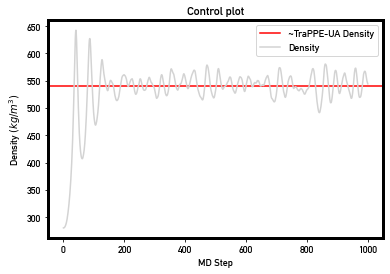

In [98]:
"""If you used GROMACS"""
import numpy as np
import pylab as plt 

import panedr
from panedr import edr_to_df

"""In the interest of time, loading in pre-simulated data"""
data = edr_to_df("../master_notebooks/example_workflow/gmx_sim/npt.edr")

plt.rcParams['font.family'] = "DIN Alternate"
font = {'family' : 'DIN Alternate',
        'weight' : 'normal',
        'size'   : 12}

fig, ax = plt.subplots(1, 1)

ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)

ax.title.set_text('Control plot')
ax.set_xlabel(r"MD Step")
ax.set_ylabel('Density $(kg / m{^3})$')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
ax.axhline(y=541, color='r', linestyle='-', label='~TraPPE-UA Density')

dt, density = list(), list()
for i, j in enumerate(data["Density"]):
    dt.append(i)
    density.append(j)
    
ax.plot(dt, density, "-", color='lightgray', label='Density')
ax.legend(loc="best")
plt.show()

### Exercise 6b - Data analysis of HOOMD-Blue simulation


In [ ]:
import numpy as np
import pylab as plt 

"""In the interest of time, loading in pre-simulated data"""
data = np.genfromtxt("../master_notebooks/example_workflow/hoomd_sim/log.txt", names=True)
system_mass = 72.15 * u.amu * 150 
volume = data["volume"] * u.nm**3 

density = (system_mass / volume).to("kg/m**3")
plt.rcParams['font.family'] = "DIN Alternate"
font = {'family' : 'DIN Alternate',
        'weight' : 'normal',
        'size'   : 12}

fig, ax = plt.subplots(1, 1)

ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["top"].set_linewidth(3)

ax.title.set_text('Control plot')
ax.set_xlabel(r"MD Step")
ax.set_ylabel('Density $(kg / m{^3})$')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
ax.axhline(y=541, color='r', linestyle='-', label='~TraPPE-UA Density')

    
ax.plot(data["timestep"][1000:], density[1000:], "-", color='lightgray', label='Density')
ax.legend(loc="best")
plt.show()